# Exercise 3, Week 4 

### ENV-501 Material and Energy Flow Analysis 

October 11th, 2022

Adapted to Jupyter Notebook by Kyle Haas

Content

[Multi-stage mass and energy flows](#ex1)

This exercise will give an example of mass flows useful for analysis of multi-stage processes, e.g. the production of a good or product with several processing steps such as how silicon undergoes processing to become a photovoltaic cell / solar panel. This exercise can be extended to the later processing of the cell into a module, then a complete array. 

<a id='ex1'></a>
## Exercise 4

Production of silicon wafers is commonly done through the Czochralski Growth Method, where an ampule of silicon is drawn from a molten vat of silicon. The CZ growth method howver uses a large amount of energy needed to purify and melt the silicion The seed crystal is used to determine the crystal orientation of the entire ingot

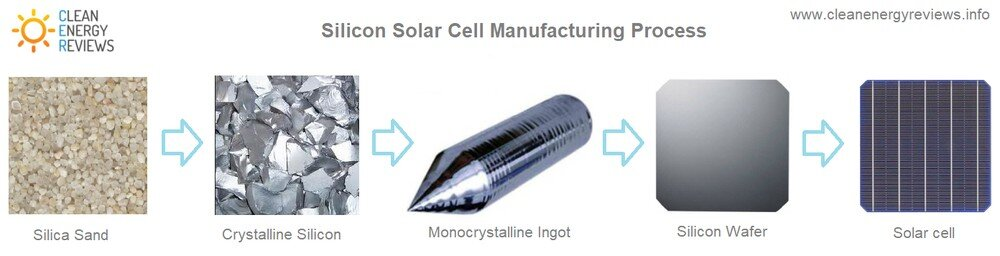

In [1]:
from IPython.display import Image 
Image(filename='Solar+cell+manufacturing+process.jpeg', width=700) 

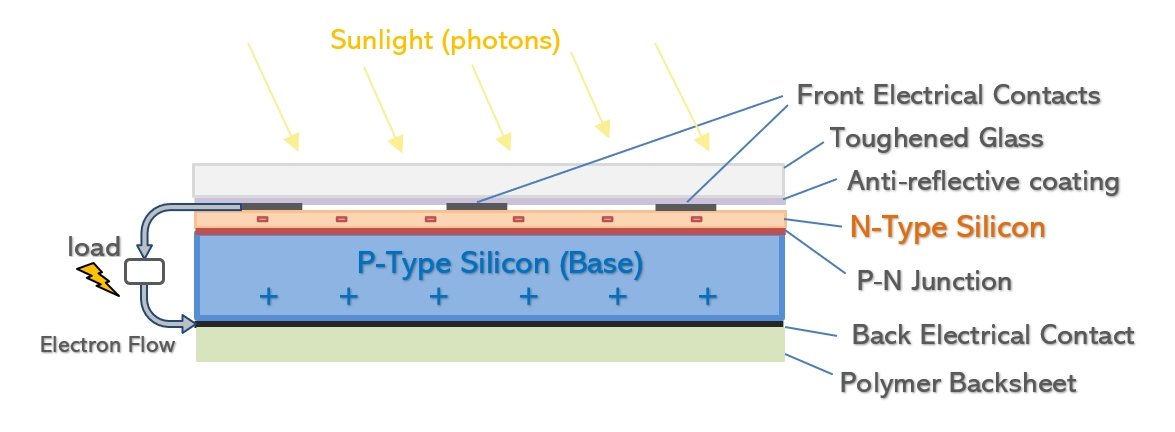

In [2]:
from IPython.display import Image 
Image(filename='Solar+Cell+Construction.jpeg', width=700) 

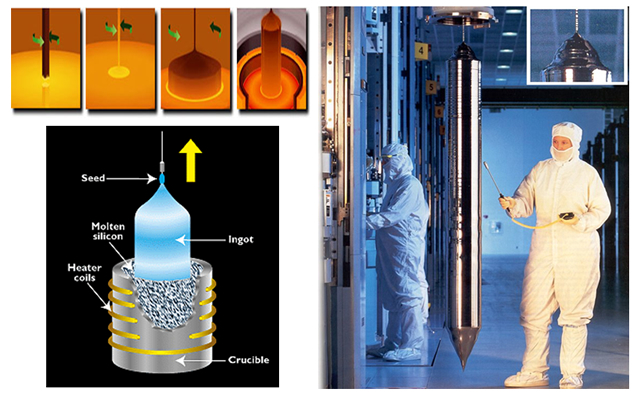

In [3]:
# Display external images using IPython.display.Image
from IPython.display import Image 
Image(filename='Cz_growth_image.jpeg', width=700) 

## Question 1: Perform a system analysis: establish the system diagram and derive the balance equations.

These are your knowns; the known inputs produce a certain known output. With this information, you can derive an intensity (how much of a given Y is required per unit of X)


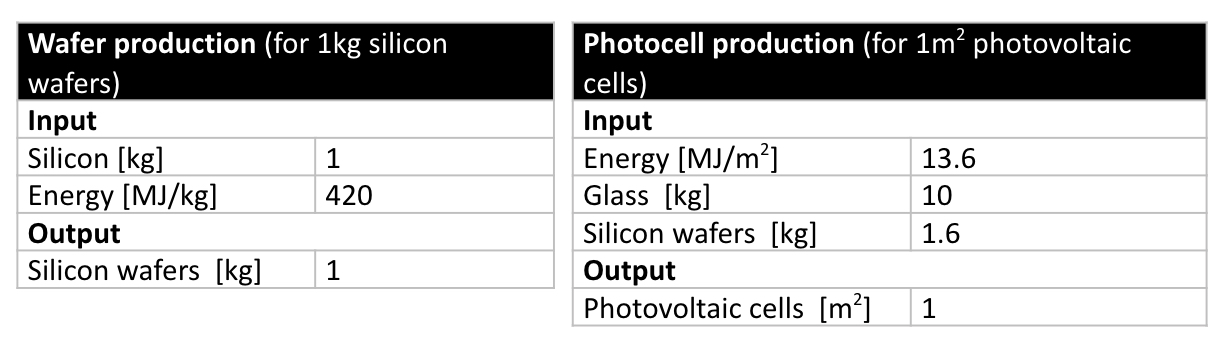

In [4]:
from IPython.display import Image 
Image(filename='PV_Cell_Production_Table.jpeg', width=700) 

In [5]:
#Wafer Production 
si_input = 1           #[kg]
energy_input_si = 420  #[MJ]
wafer_output = 1       #[kg]

#Photovoltaic cell production
energy_input_PV = 13.6 #[MJ]
glass_input = 10       #[kg]
wafer_input = 1.6      #[m2]
PV_cell_output = 1     #[m2]

HINT: Breaking the process flow into two stages, build the equations for each independent stage, then the whole complete stage by combining your equations. 

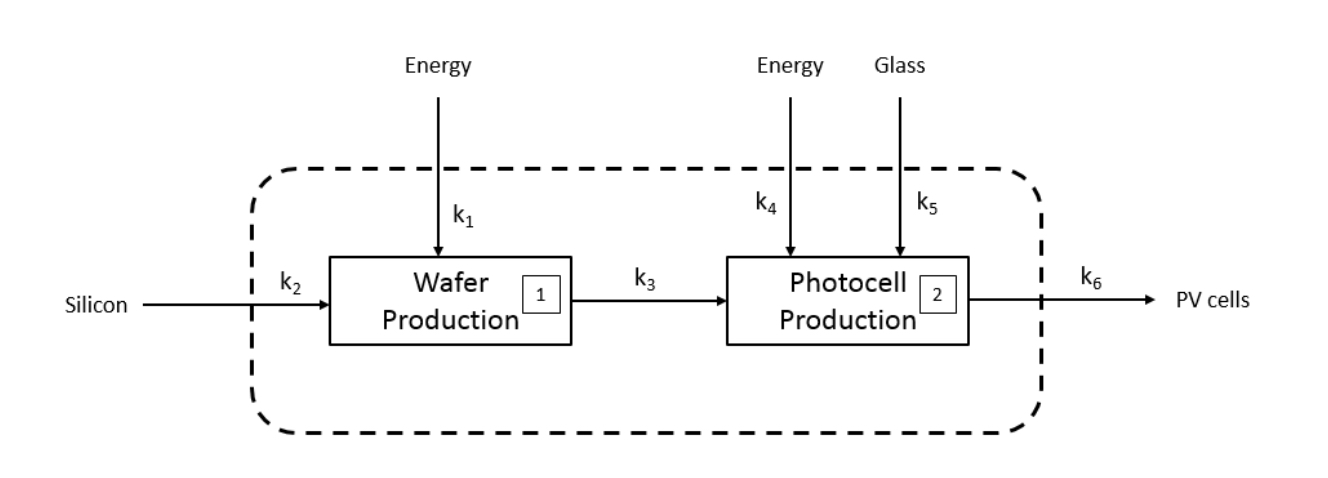

In [6]:
from IPython.display import Image 
Image(filename='PV_material_flow.jpeg', width=700) 

### Wafer Production can be broken into it's independent inputs and outputs

wafer_output x k3 = si_input x k1+energy_input x k2

### PV Cell Production can be broken into it's independent inputs and outputs

PV_cell_output x k6 = wafer_output x k3 + energy_input_PV x k4 + glass_input x k5

### You can insert equation 1 into the second equation to solve for the entire system flow

PV_cell_output x k6 = si_input x k1 + energy_input x k2 + energy_input_PV x k4 + glass_input x k5


## Question 2: Develop the output equations considering each of the inputs, and calculate the amount of energy, silicon and glass needed to produce 1 m2 of PV cells.


In [7]:
# solve for the k rate / itensities needed to produce a known amount of PV cells

#Wafer Production 
k1 = energy_input_si/ wafer_output
k2 = si_input / wafer_output

#PV Cell Production
k3 = wafer_input/PV_cell_output
k4 = energy_input_PV/PV_cell_output
k5 = glass_input/PV_cell_output
k6 = PV_cell_output/PV_cell_output

#Amount of PV cells you need to produce
PV_out = 167
#Solving for the photovoltaic production requirements using the itensities
glass_req = k5*PV_out
energy_req_PV = k4*PV_out
si_req_PV = k3*PV_out
#Solving for the silicon production flow
energy_req_si = k1*si_req_PV
raw_si_req = k2*si_req_PV

total_si_needed = raw_si_req
total_energy_needed = energy_req_si+energy_req_PV
total_glass_needed = glass_req

print('Total Silicon Needed =', total_si_needed, 'Kg')
print('Total Energy Required =',total_energy_needed, 'MJ')
print('Total Glass Needed =',total_glass_needed, 'Kg')

Total Silicon Needed = 267.2 Kg
Total Energy Required = 114495.2 MJ
Total Glass Needed = 1670.0 Kg


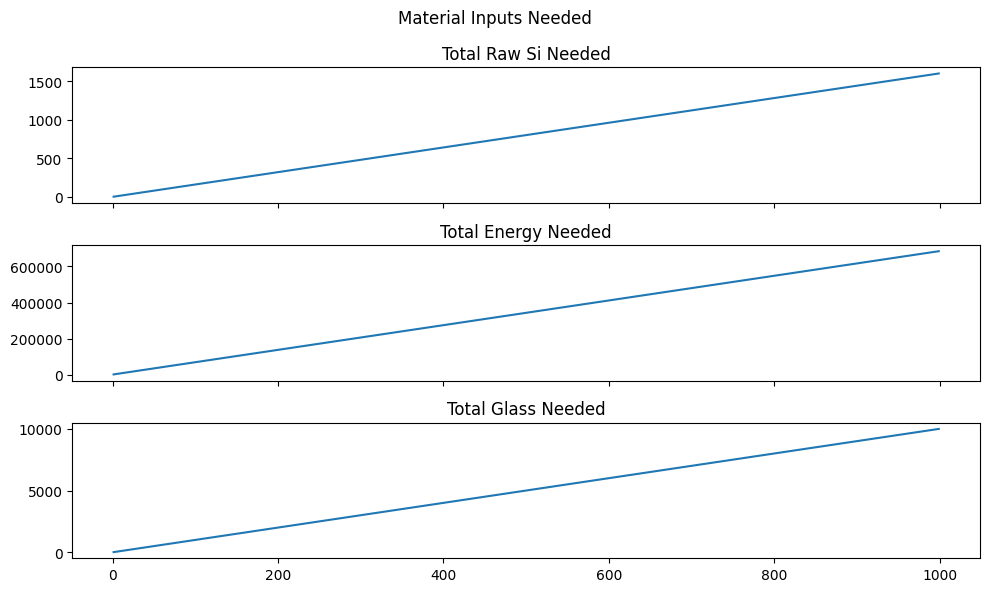

In [10]:
#You can adjust the PV_out to however much PV m2 you need and see how the inputs change

import matplotlib.pyplot as plt

fig, (ax1,ax2,ax3) = plt.subplots(3,sharex=True, figsize=(10,6))

total_si_needed = []
total_energy_needed =[]
total_glass_needed=[]

x =[]
for i in range(1,1000):
    PV_out = i
    glass_req = k5*PV_out
    energy_req_PV = k4*PV_out
    si_req_PV = k3*PV_out
    energy_req_si = k1*si_req_PV
    raw_si_req = k2*si_req_PV
    
    total_si_needed.append(si_req_PV)
    total_energy_needed.append((energy_req_si+energy_req_PV))
    total_glass_needed.append(glass_req)
    x.append(i) 
    
fig.suptitle('Material Inputs Needed')
ax1.plot(x,total_si_needed)
ax1.set_title('Total Raw Si Needed')
ax2.plot(x,total_energy_needed)
ax2.set_title('Total Energy Needed')
ax3.plot(x,total_glass_needed,)
ax3.set_title('Total Glass Needed')

plt.tight_layout()
plt.show()


This graph wasn't neccessary, but it shouldn't suprise you; we should expect a linear relationship unless specified (or hinted at otherwise). 

The power of analyses like this is that when the intensities change (your k rate) you can show just how much material or energy the chage of step produces in context with the entire processesing scheme. Additionally, the k values can be altered to reflect non-linear relations, which often describe more real-world scenarios and processes. 

Example: if you're building a machine / device and it needs electricity, say, a vacuum pump. The more power [W] it needs, the more current and heating losses it will draw, which scales as I^2R (This can be avoided by using bigger electrical cables with less resistance, but you get the idea). Hence, energy input (or at least the hardwear needed to carrier larger electrical loads) generally scales non-linearly.

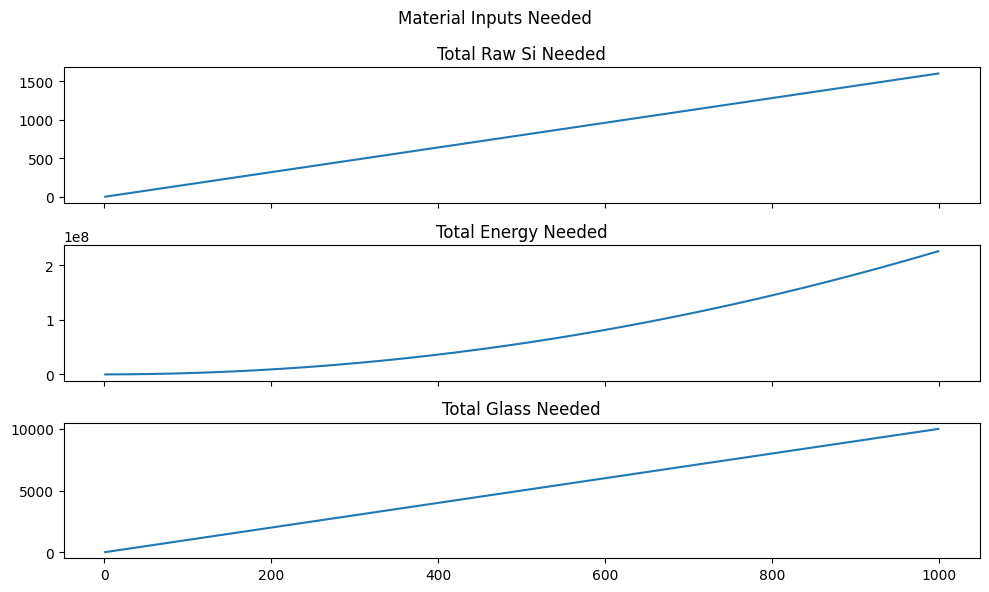

In [9]:
#You can adjust the PV_out to however much PV m2 you need and see how the inputs change

import matplotlib.pyplot as plt

fig, (ax1,ax2,ax3) = plt.subplots(3,sharex=True,figsize=(10,6))

total_si_needed = []
total_energy_needed =[]
total_glass_needed=[]

x =[]
for i in range(1,1000):
    PV_out = i
    glass_req = k5*PV_out
    energy_req_PV = k4*PV_out
    si_req_PV = k3*PV_out
    energy_req_si = k1*si_req_PV+(k1*si_req_PV)**2*0.0005
    raw_si_req = k2*si_req_PV
    
    total_si_needed.append(si_req_PV)
    total_energy_needed.append((energy_req_si+energy_req_PV))
    total_glass_needed.append(glass_req)
    x.append(i) 
    
fig.suptitle('Material Inputs Needed')
ax1.plot(x,total_si_needed)
ax1.set_title('Total Raw Si Needed')
ax2.plot(x,total_energy_needed)
ax2.set_title('Total Energy Needed')
ax3.plot(x,total_glass_needed,)
ax3.set_title('Total Glass Needed')

plt.tight_layout()
plt.show()
